In [104]:
import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.0f}'.format
DATASET_BASE_PATH = "C:/Users/guibs/Documents/GitHub/SGD/PROJ2/DataSets"

In [105]:
#Read and Merge AQ Data
AQ2019=pd.concat([pd.read_csv(f"{DATASET_BASE_PATH}/2019Q1.csv"),\
                  pd.read_csv(f"{DATASET_BASE_PATH}/2019Q2.csv"),\
                  pd.read_csv(f"{DATASET_BASE_PATH}/2019Q3.csv"),\
                  pd.read_csv(f"{DATASET_BASE_PATH}/2019Q4.csv")])

AQ2020=pd.concat([pd.read_csv(f"{DATASET_BASE_PATH}/2020Q1.csv"),\
                  pd.read_csv(f"{DATASET_BASE_PATH}/2020Q2.csv"),\
                  pd.read_csv(f"{DATASET_BASE_PATH}/2020Q3.csv"),\
                  pd.read_csv(f"{DATASET_BASE_PATH}/2020Q4.csv")])

AQ2021=pd.concat([pd.read_csv(f"{DATASET_BASE_PATH}/2021Q1.csv"),\
                  pd.read_csv(f"{DATASET_BASE_PATH}/2021Q2.csv"),\
                  pd.read_csv(f"{DATASET_BASE_PATH}/2021Q3.csv"),\
                  pd.read_csv(f"{DATASET_BASE_PATH}/2021Q4.csv")])


In [106]:
#Dump to File
AQ2019.to_csv(f"{DATASET_BASE_PATH}/AQ2019.csv")
AQ2020.to_csv(f"{DATASET_BASE_PATH}/AQ2020.csv")
AQ2021.to_csv(f"{DATASET_BASE_PATH}/AQ2021.csv")


In [107]:

#CD=pd.read_excel(f"{DATASET_BASE_PATH}/Covid.xlsx")
#VD=pd.read_csv(f"{DATASET_BASE_PATH}/Vaccination.xlsx")

#Merge Air quality DataSets
AQ = pd.concat([AQ2019,AQ2020,AQ2021])
AQ.to_csv("C:/Users/guibs/Documents/GitHub/SGD/PROJ2/DataSets/AQ.csv")

In [108]:
#CD.head()
#VD.head()

In [109]:
#AQ2019['month'] = pd.to_datetime(AQ2019['Date']).dt.month
#AQ2020['month'] = pd.to_datetime(AQ2020['Date']).dt.month + 12
#AQ2021['month'] = pd.to_datetime(AQ2021['Date']).dt.month + 24
#AQ2019['day'] = pd.to_datetime(AQ2019['Date']).dt.day
#AQ2020['day'] = pd.to_datetime(AQ2020['Date']).dt.day
#AQ2021['day'] = pd.to_datetime(AQ2021['Date']).dt.day
#
#AQv2 = pd.concat([AQ2019,AQ2020,AQ2021])
#
#AQv2 = AQv2[\
#        (AQv2['City'] == 'Lisbon') &
#        (AQv2['Specie'] == 'pm10') #&
#    ]
#print(AQv2)

              Date Country    City Specie  count  min  max  median  variance  \
372012  2019-01-14      PT  Lisbon   pm10     96   18   48      28       711   
372013  2019-01-24      PT  Lisbon   pm10     96    6   18      10       143   
372014  2019-01-26      PT  Lisbon   pm10     72   14   37      20       410   
372015  2019-02-11      PT  Lisbon   pm10     96   10   21      13        71   
372016  2019-03-25      PT  Lisbon   pm10     95   15   22      19        30   
...            ...     ...     ...    ...    ...  ...  ...     ...       ...   
110416  2021-11-01      PT  Lisbon   pm10     17    5   18       7       185   
110417  2021-11-08      PT  Lisbon   pm10     38    1   24      13       213   
110418  2021-11-22      PT  Lisbon   pm10     15    8   19      13       105   
110419  2021-11-29      PT  Lisbon   pm10     29    1   18       8       102   
110420  2021-09-28      PT  Lisbon   pm10     29    4   19       9       220   

        month  day  
372012      1   14

<AxesSubplot:xlabel='month,day,Specie'>

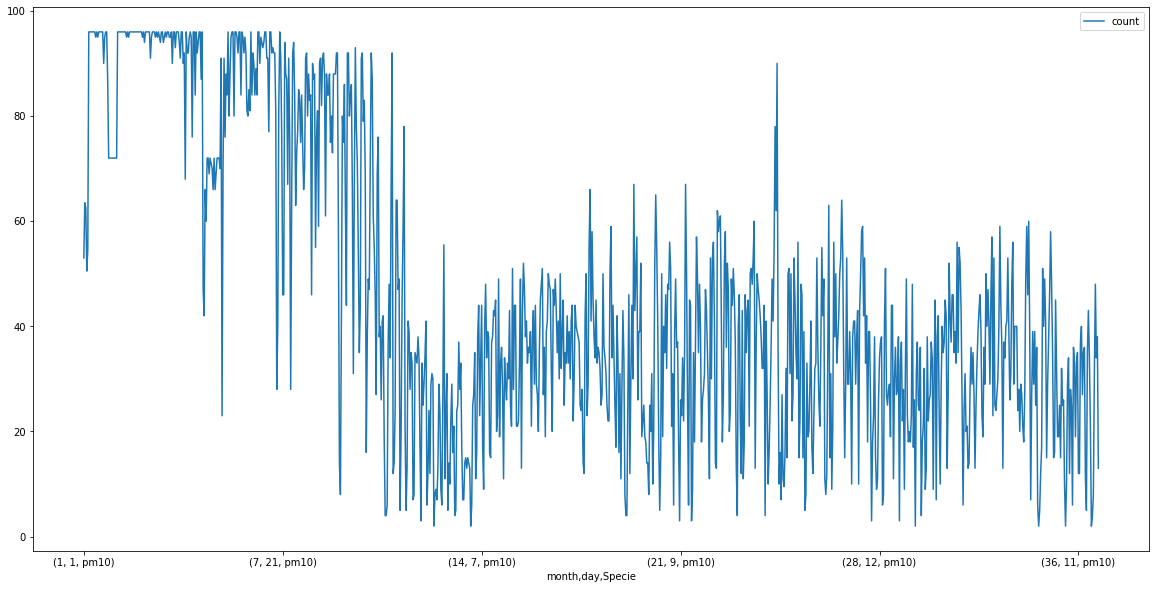

In [122]:
#figsize = (20,10)
#AQv2 = AQv2.groupby(['month','day','Specie']).agg({'count': 'median'})
#AQv2.plot(figsize=figsize,x_compat=True)

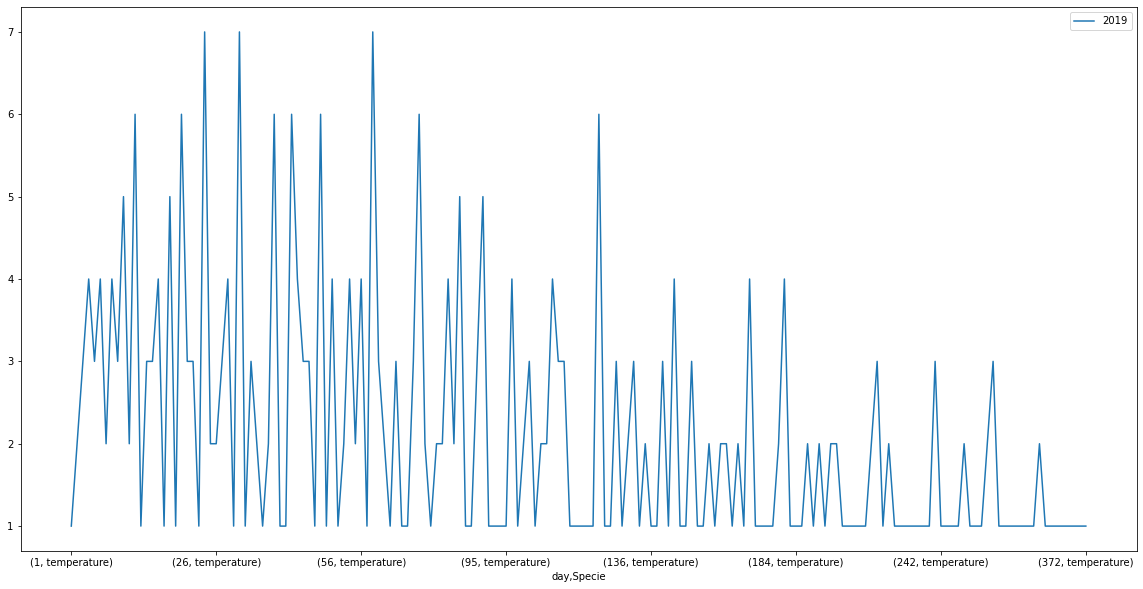

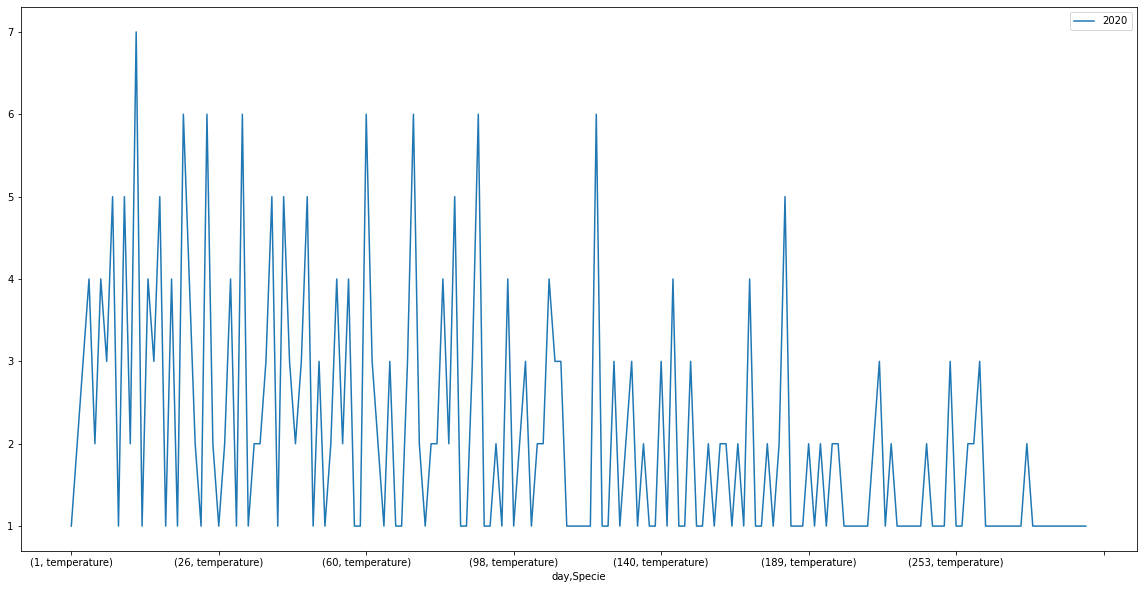

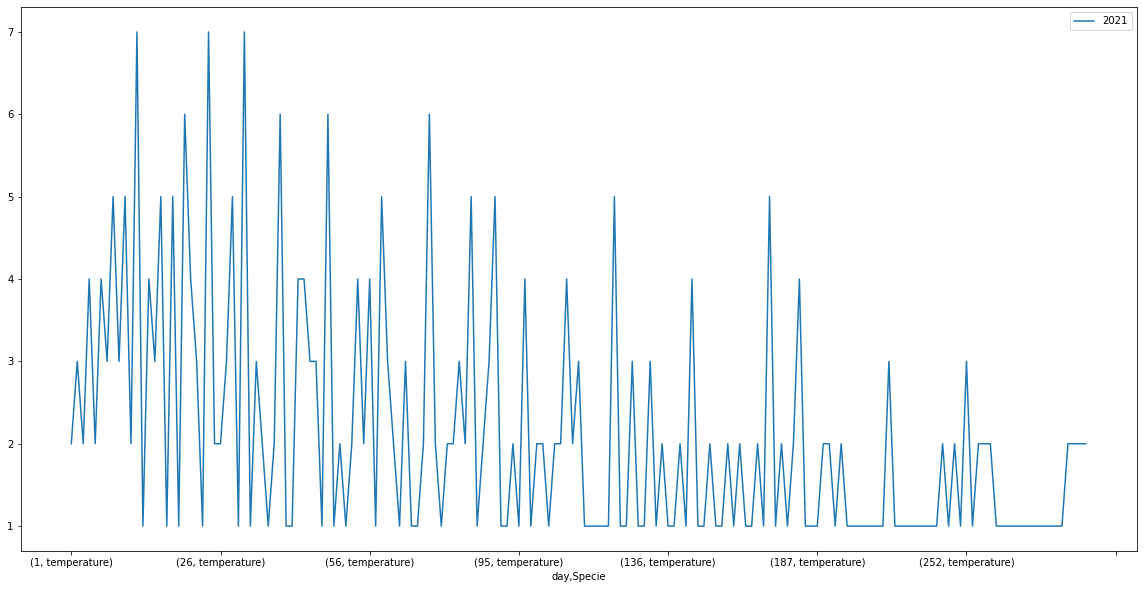

In [135]:
#Add Missing Columns

AQ2019['month'] = pd.to_datetime(AQ2019['Date']).dt.month
AQ2020['month'] = pd.to_datetime(AQ2020['Date']).dt.month
AQ2021['month'] = pd.to_datetime(AQ2021['Date']).dt.month
AQ2019['day'] = pd.to_datetime(AQ2019['Date']).dt.day * pd.to_datetime(AQ2019['Date']).dt.month
AQ2020['day'] = pd.to_datetime(AQ2020['Date']).dt.day * pd.to_datetime(AQ2020['Date']).dt.month
AQ2021['day'] = pd.to_datetime(AQ2021['Date']).dt.day * pd.to_datetime(AQ2021['Date']).dt.month

#Filter By city
LisbonAQ19 = AQ2019[\
        (AQ2019['City'] == 'Lisbon') &
        (AQ2019['Specie'] == 'temperature') #&
        #(AQ2019['month'].isin([10,11,12]))
    ]
LisbonAQ20 = AQ2020[\
        (AQ2020['City'] == 'Lisbon') &
        (AQ2020['Specie'] == 'temperature')
    ]
LisbonAQ21 = AQ2021[\
        (AQ2021['City'] == 'Lisbon') &
        (AQ2021['Specie'] == 'temperature')
    ]

#Plot it


LisbonAQ19 = LisbonAQ19.groupby(['day','Specie']).agg({'median': 'count'})
LisbonAQ20 = LisbonAQ20.groupby(['day','Specie']).agg({'median': 'count'})
LisbonAQ21 = LisbonAQ21.groupby(['day','Specie']).agg({'median': 'count'})
figsize = (20,10)
LisbonAQ19.plot(figsize=figsize,x_compat=True)
plt.legend(["2019"])
LisbonAQ20.plot(figsize=figsize)
plt.legend(["2020"])
LisbonAQ21.plot(figsize=figsize)
plt.legend(["2021"])